**Penerapan Metode Self-Organizing Map (SOM) untuk Segmentasi Citra Lenna**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [3]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

The function returns a randomly initialized weight matrix for the SOM, where the dimensions of the weight matrix are determined by output_shape.

In [4]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

The function calculates the Euclidean distance between the input vector and each weight vector in the SOM. The output is a 2-D NumPy array where each element represents the distance between the input vector and the corresponding SOM node.

In [5]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

The function first calculates the distances between the input vector and all the weight vectors using the calculate_distance function. Then, it finds the index of the unit with the minimum distance, indicating the winning unit. The function returns a tuple containing the indices of the winning unit in the grid.

In [6]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

The function calculates the Euclidean distances between the winning unit and all other units in the SOM grid. It then computes the influence of each unit based on the distances and the neighborhood radius. The weights of the winning unit and its neighbors are updated according to the input vector, learning rate, and influence values.

In [7]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

The function first initializes the SOM weights using the initialize_weights function. Then, for each epoch, it updates the learning rate and neighborhood radius based on the current epoch number. The function processes every pixel in the input image and updates the weights of the SOM using the update_weights function.

In [8]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "dataset/Lenna.png"
Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [9]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

This code have trained a Self-Organizing Map (SOM) on the Lenna image with 100 epochs, an initial learning rate of 0.1, and an initial neighborhood radius of 5.

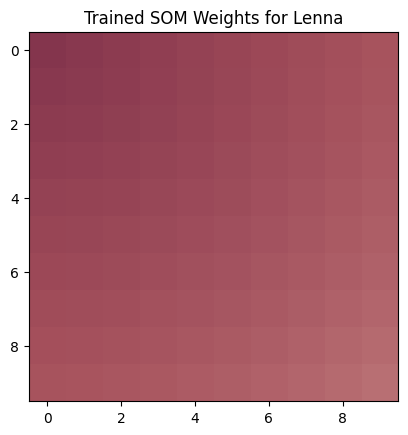

In [10]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lenna')
plt.show()

This code will provided attempts to visualize the trained weights of the Self-Organizing Map (SOM) using a simple imshow plot.